Name= Natender<br>
Matriculation No= 58273841<br>



Q1 Import the dataset into a pandas dataframe. Make sure that the date column is 
in pandas date time format.

In [73]:
import pandas as pd
df = pd.read_csv("train.csv")

print(df)
df['datetime']=pd.to_datetime(df['datetime'])
print(df.dtypes)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

Q2 Check the data type of each column. How many rows are there in the dataset? Does the dataset contain any missing values ?

In [74]:
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
(10886, 12)
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


Q3 Using the date column, create new columns for: year, month, day of the week 
and hour of the day.

In [75]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()  
df['hour'] = df['datetime'].dt.hour
print(df[['datetime', 'year', 'month', 'day_of_week', 'hour']])              

                 datetime  year  month day_of_week  hour
0     2011-01-01 00:00:00  2011      1    Saturday     0
1     2011-01-01 01:00:00  2011      1    Saturday     1
2     2011-01-01 02:00:00  2011      1    Saturday     2
3     2011-01-01 03:00:00  2011      1    Saturday     3
4     2011-01-01 04:00:00  2011      1    Saturday     4
...                   ...   ...    ...         ...   ...
10881 2012-12-19 19:00:00  2012     12   Wednesday    19
10882 2012-12-19 20:00:00  2012     12   Wednesday    20
10883 2012-12-19 21:00:00  2012     12   Wednesday    21
10884 2012-12-19 22:00:00  2012     12   Wednesday    22
10885 2012-12-19 23:00:00  2012     12   Wednesday    23

[10886 rows x 5 columns]


Q4 Rename the values in the season column to spring, summer, fall and winter.

In [76]:
season_map = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
df['season'] = df['season'].map(season_map)
print(df)


                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00  spring        0           0        1   9.84   
1     2011-01-01 01:00:00  spring        0           0        1   9.02   
2     2011-01-01 02:00:00  spring        0           0        1   9.02   
3     2011-01-01 03:00:00  spring        0           0        1   9.84   
4     2011-01-01 04:00:00  spring        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00  winter        0           1        1  15.58   
10882 2012-12-19 20:00:00  winter        0           1        1  14.76   
10883 2012-12-19 21:00:00  winter        0           1        1  13.94   
10884 2012-12-19 22:00:00  winter        0           1        1  13.94   
10885 2012-12-19 23:00:00  winter        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

Q5 Calculate the total number of casual and registered bikes rented in the years 
2011 and 2012.

In [77]:
totals_by_year = df.groupby('year')[['casual','registered']].sum()
print(totals_by_year)

      casual  registered
year                    
2011  155817      626162
2012  236318     1067179


Q6  Calculate the mean of the hourly total rentals count by season. Which season 
has the highest mean ?

In [78]:
mean_by_season = df.groupby('season')['count'].mean().sort_values(ascending=False)
print(mean_by_season)

highest_season = mean_by_season.idxmax()
print("Highest mean season:", highest_season)

season
fall      234.417124
summer    215.251372
winter    198.988296
spring    116.343261
Name: count, dtype: float64
Highest mean season: fall


Q7 Are more bikes rented by registered users on working or non-working days ?  
Does the answer differ for non-registered users ? Is the answer the same for 
both years ?

In [79]:
overall_working = df.groupby('workingday')[['registered','casual']].mean()
print("Overall mean by workingday (0=non-working,1=working):")
print(overall_working)


by_year_working = df.groupby(['year','workingday'])[['registered','casual']].mean()
print(by_year_working)
print("More bikes are rented by Registered user on working days and non-working days in both years.") 

Overall mean by workingday (0=non-working,1=working):
            registered     casual
workingday                       
0           129.198330  59.308290
1           167.904209  25.107663
                 registered     casual
year workingday                       
2011 0            97.153132  48.201276
     1           124.031909  19.664143
2012 0           160.767429  70.250286
     1           211.587507  30.527733
More bikes are rented by Registered user on working days and non-working days in both years.


Q8 Which months in the year 2011 have the highest and the lowest total number of 
bikes rented ? Repeat for the year 2012.

In [80]:
monthly_totals = df.groupby(['year','month'])['count'].sum().unstack(level=0)  
print(monthly_totals)


highest_2011 = monthly_totals[2011].idxmax()
lowest_2011  = monthly_totals[2011].idxmin()
highest_2012 = monthly_totals[2012].idxmax()
lowest_2012  = monthly_totals[2012].idxmin()

print("2011 highest month:", highest_2011, "lowest month:", lowest_2011)
print("2012 highest month:", highest_2012, "lowest month:", lowest_2012)

year    2011    2012
month               
1      23552   56332
2      32844   66269
3      38735   94766
4      50517  116885
5      79713  120434
6      89776  130957
7      92848  121769
8      83296  130220
9      79104  133425
10     79522  127912
11     70889  105551
12     61183   98977
2011 highest month: 7 lowest month: 1
2012 highest month: 9 lowest month: 1


Q9 Which type of weather have the highest and lowest mean of the hourly total 
rentals count ?

In [81]:
mean_by_weather = df.groupby('weather')['count'].mean().sort_values(ascending=False)
print(mean_by_weather)


print("Highest weather type:", mean_by_weather.idxmax())
print("Lowest weather type :", mean_by_weather.idxmin())

weather
1    205.236791
2    178.955540
4    164.000000
3    118.846333
Name: count, dtype: float64
Highest weather type: 1
Lowest weather type : 3


Q10 Calculate the correlation between the hourly total rentals count and all the 
numerical columns in the dataset. Which column has the highest correlation 
with the total rentals count ?

In [82]:
corr_matrix = df.corr(numeric_only=True)

corr_with_count = corr_matrix['count'].sort_values(ascending=False)
print(corr_with_count)


count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


Q11 Create a new categorical column called day_period, which can take four 
possible values: night, morning, afternoon and evening. These values 
correspond to the following binning of the hour column: 0-6: night, 6-12:
morning, 12-6: afternoon, 6-24:evening.

In [83]:
def get_day_period(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['day_period'] = df['hour'].apply(get_day_period)
print(df)



                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00  spring        0           0        1   9.84   
1     2011-01-01 01:00:00  spring        0           0        1   9.02   
2     2011-01-01 02:00:00  spring        0           0        1   9.02   
3     2011-01-01 03:00:00  spring        0           0        1   9.84   
4     2011-01-01 04:00:00  spring        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00  winter        0           1        1  15.58   
10882 2012-12-19 20:00:00  winter        0           1        1  14.76   
10883 2012-12-19 21:00:00  winter        0           1        1  13.94   
10884 2012-12-19 22:00:00  winter        0           1        1  13.94   
10885 2012-12-19 23:00:00  winter        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

Q12 Generate a pivot table for the mean of the hourly total rentals count, with the 
index set to the day period and the column set to the working day column. 
What can you observe from the table ?

In [84]:
pivot_table = pd.pivot_table(
    df,
    values="count",          
    index="day_period",
    columns="workingday",    
    aggfunc="mean"
)

print(pivot_table)



workingday           0           1
day_period                        
afternoon   371.022989  266.196141
evening     180.182759  251.054662
morning     157.772414  234.353763
night        44.052083   16.217582


PART-2 DATA VISUALIZATION 

Q1 Plot the distributions of all the numerical columns in the dataset using 
histograms.

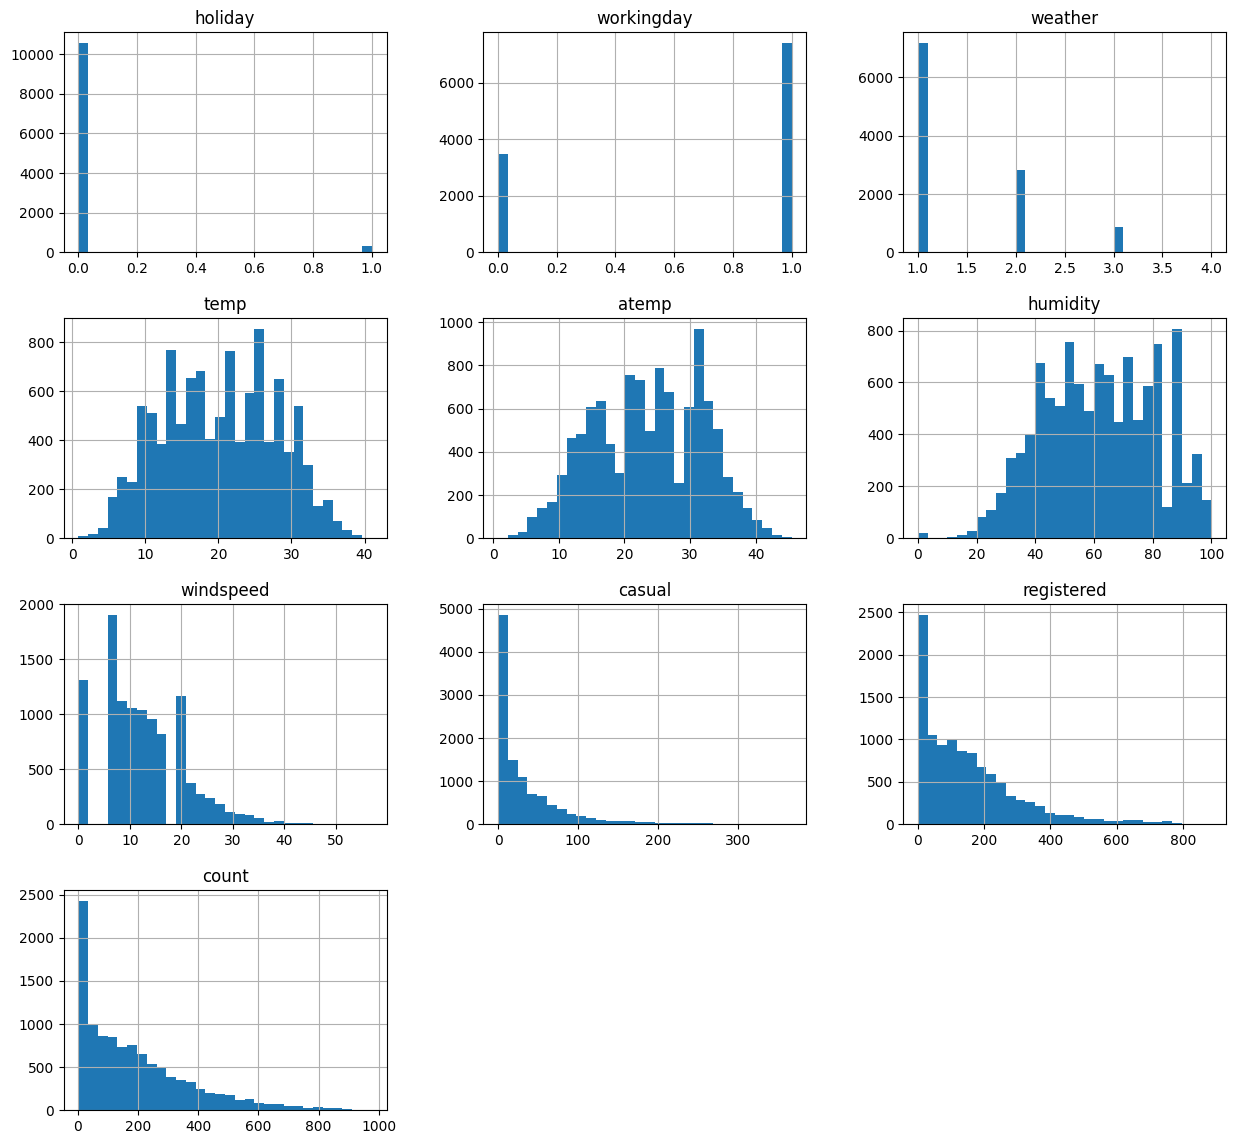

In [85]:
import matplotlib.pyplot as plt
num_col= df.select_dtypes(include=['int64','float64']).columns

df[num_col].hist(bins=30, figsize=(15,14))
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()


Q2 Plot the distributions of all the numerical columns in the dataset using box 
plots.

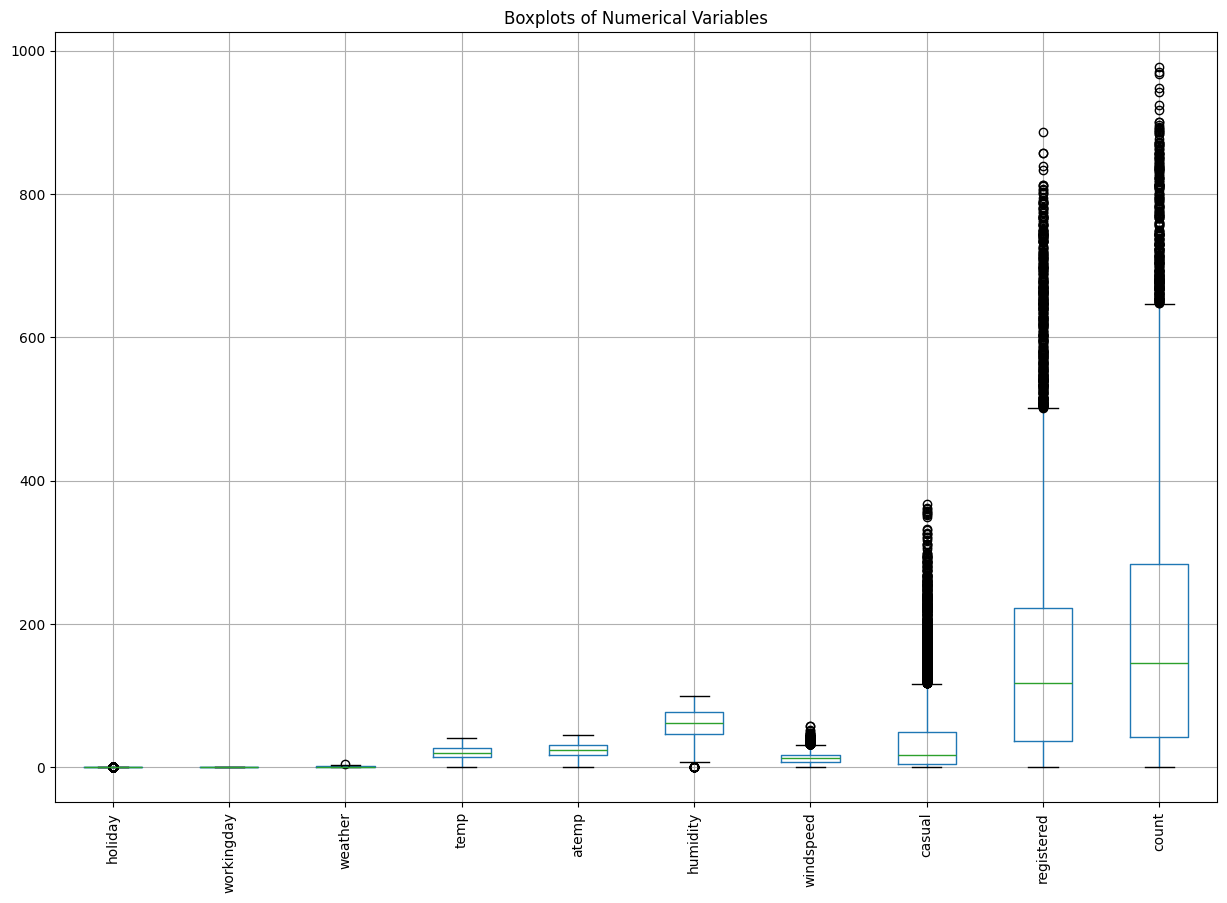

In [ ]:
plt.figure(figsize=(15, 10))
df[num_col].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables')
plt.show()

Q3 Plot the the mean of the hourly total rentals count for working and non
working days.

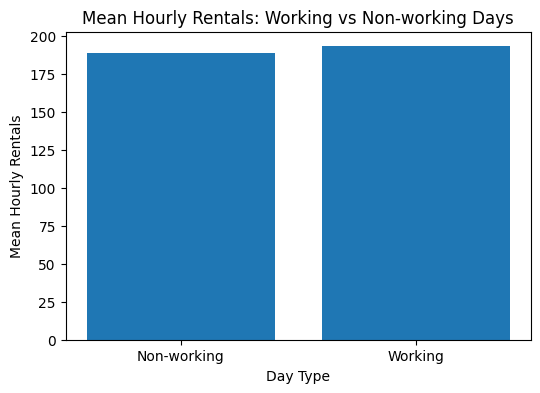

In [95]:
import matplotlib.pyplot as plt
mean_working = df.groupby('workingday')['count'].mean()
plt.figure(figsize=(6, 4))
plt.bar(mean_working.index.astype(str), mean_working.values)
plt.xticks([0, 1], ['Non-working', 'Working'])
plt.xlabel('Day Type')
plt.ylabel('Mean Hourly Rentals')
plt.title('Mean Hourly Rentals: Working vs Non-working Days')

plt.show()

Q4  Plot the the mean of the hourly total rentals count for the different months for 
both years combined.


month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


<Figure size 800x500 with 0 Axes>

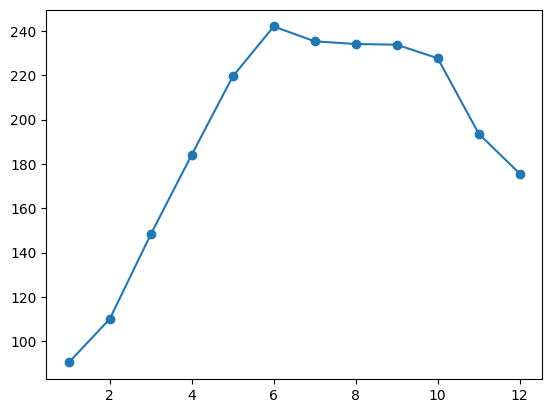

<Figure size 800x500 with 0 Axes>

In [101]:
import matplotlib.pyplot as plt

monthly_mean = df.groupby('month')['count'].mean()
print(monthly_mean)
plt.plot(monthly_mean.index, monthly_mean.values, marker='o')
plt.figure(figsize=(8, 5))

Q5  Plot the the mean of the hourly total rentals count for the different months for 
both years separately in a multi-panel figure

In [ ]:
import matplotlib.pyplot as plt
monthly_mean = df.groupby('month')['count'].mean().reset_index()
print(monthly_mean)
data_2011 = monthly_mean[monthly_mean['yr'] == 0]
data_2012 = monthly_mean[monthly_mean['yr'] == 1]
